In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [103]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\Laptop_price.csv")

In [105]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [107]:
X = pd.get_dummies(df.drop('Price',axis=1),drop_first=True,dtype=int)
y = df['Price']

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [111]:
scaler = StandardScaler()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [117]:
# RMSE in test and train data per degrees

In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()

In [121]:
rmse_train = []
rmse_test = []
for degree in range(1,7):
    poly = PolynomialFeatures(degree = degree)
    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.fit_transform(X_test)
    linear_model.fit(poly_X_train,y_train)
    predictions_train = linear_model.predict(poly_X_train)
    predictions_test = linear_model.predict(poly_X_test)
    rmse_train.append(np.sqrt(mean_squared_error(y_train,predictions_train)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,predictions_test)))

In [122]:
rmse_test

[179.73518669416876,
 182.62609699552385,
 302.17780342372845,
 338.09022935073887,
 669.7435206466223,
 893.1447570351526]

In [123]:
rmse_train

[199.5461831492449,
 195.61935369862985,
 264.82587189081227,
 236.18947109530416,
 104.90534740690256,
 133.0453760395247]

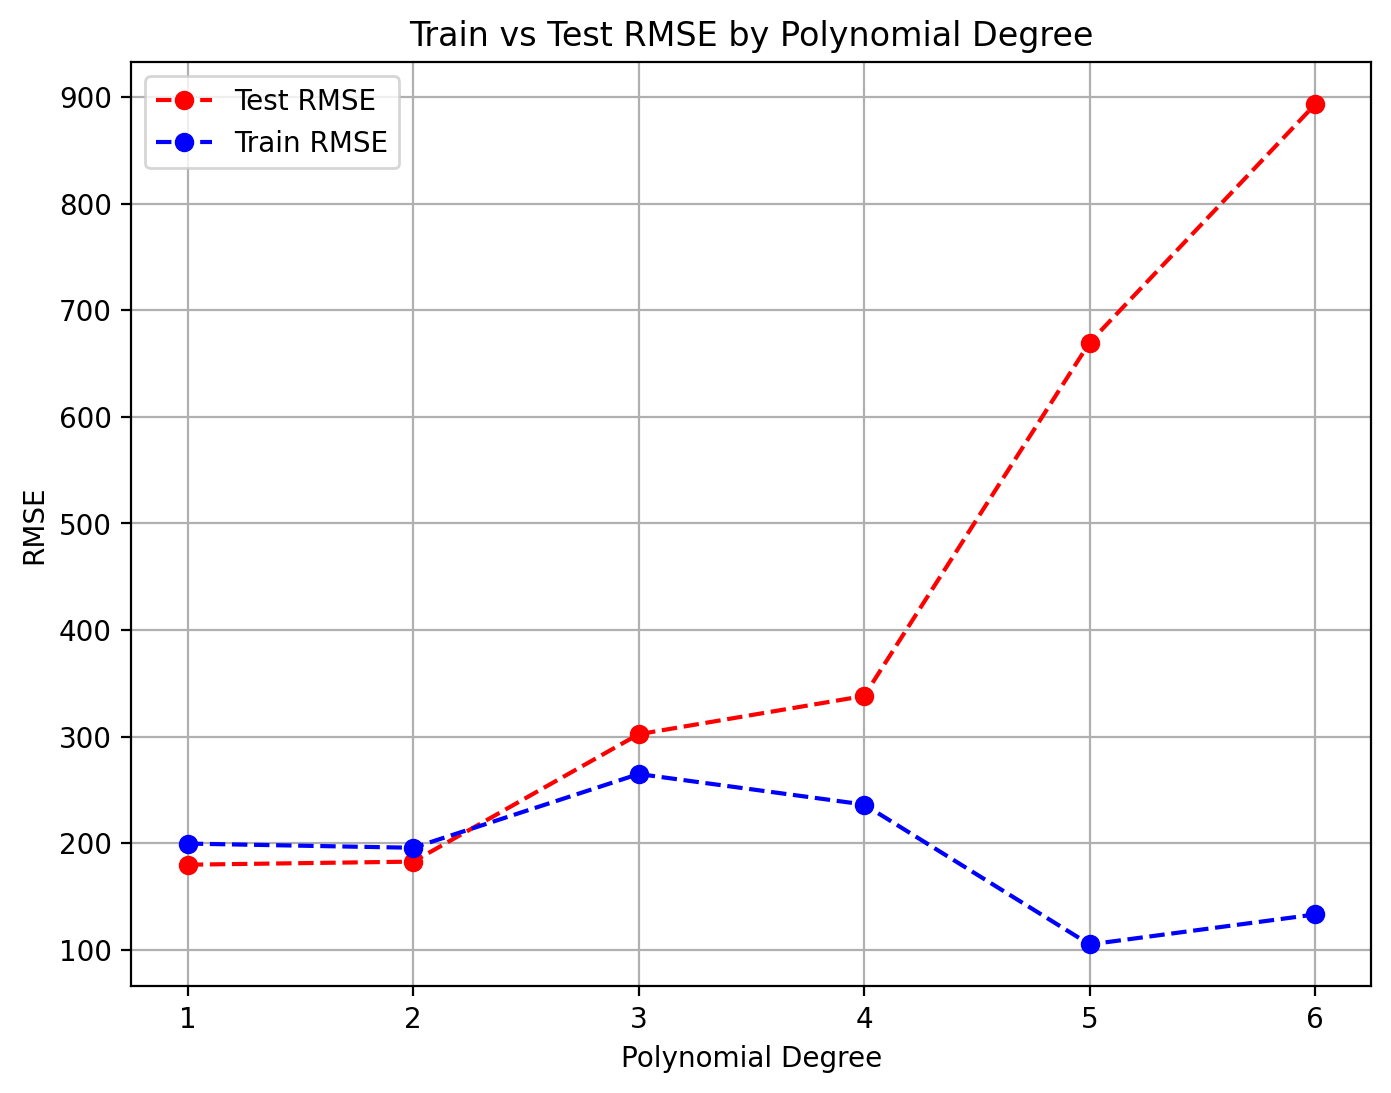

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=200)

degrees = list(range(1, 7))  # make sure rmse_train and rmse_test have 6 values

plt.plot(degrees, rmse_test, color='red', marker='o', linestyle='--', label='Test RMSE')
plt.plot(degrees, rmse_train, color='blue', marker='o', linestyle='--', label='Train RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Train vs Test RMSE by Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


In [128]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

In [131]:
linear_model = LinearRegression()
linear_model.fit(scaled_X_train,y_train)

LinearRegression()

In [133]:
predictions = linear_model.predict(scaled_X_test)

In [135]:
mean_squared_error(y_test,predictions)

32304.73733598812